<a href="https://colab.research.google.com/github/hyeon9698/Donghyeon_Cho/blob/main/week_7/07%EC%9E%A5_%EB%B9%84%EC%84%A0%ED%98%95_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7장 Support Vector machine

### 비선형 SVM

In [1]:
##5장에서 사용한 iris data 사용

import seaborn as sns
iris=sns.load_dataset('iris') # iris data 불러오기
X=iris.drop('species',axis=1) # 특성변수만으로 구성된 X data Frame 생성
y=iris['species']             # 분류의 목적 변수만으로 구성된 y data Frame생성

from sklearn.preprocessing import LabelEncoder #범주형 변수 숫자로 치환하는 함수 호출
classle=LabelEncoder()
y=classle.fit_transform(iris['species'].values)#범주형 변수 숫자로 치환

from sklearn.model_selection import train_test_split #train set과 test set으로 데이터 나누기 위한 함수 호출
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=123, stratify=y)



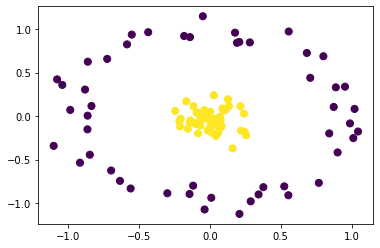

In [2]:
###############Kernel SVM의 이해 예제###########

#평면상의 자료의 표현
%matplotlib inline    
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100,noise=0.1,factor=0.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50)

In [3]:
#Kernel SVM의 이해 예제
#z축을 도입하여 자료를 표현
import numpy as np
r = np.exp(-(X ** 2).sum(1))
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(azim=50, elev=30)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
interact(plot_3D, elev=[-90, 90], azip=(-180, 180),X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [4]:
##############Kernel SVM 예제##########################
from sklearn.svm import SVC #SVM함수의 호출
ksvm=SVC(kernel='rbf',C=1.0,gamma=0.2,random_state=42)
ksvm.fit(X_train,y_train)
y_train_pred=ksvm.predict(X_train) # kernel SVM을 이용한 train set의 y 예측치 구하기
y_test_pred=ksvm.predict(X_test) # kernel SVM을 이용한 #test set의 y예측치 구하기

In [5]:
from sklearn import metrics
print(metrics.accuracy_score(y_train,y_train_pred))  # train set의 accuracy ratio
print(metrics.accuracy_score(y_test,y_test_pred))   # test set의 accuracy ratio

0.9904761904761905
0.9555555555555556


In [6]:
metrics.confusion_matrix(y_test,y_test_pred)   #confusion_matrix

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 15]])

In [7]:
print(ksvm.n_support_)

[ 5 14 15]
